## Objective

#### In this notebook, i simulated one source and ran the source finding algorithm to recover the source.

In [50]:
import numpy as np
import copy as duplicate
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import Nested_Sampling_3 as NS3
import Metropolis_Hasting_3_0T as MH3

import Nest_iterator_functions as nsf


from tabulate import tabulate

In [36]:
def logLikelihood(thetas):

    """Simple gaussian Likelihood

    Parameters
    --------------
    thetas : array
            parameter values [a,b,c,d]

    *args : list
            Likelihood extra arguments

    --------------
    output: scalar
            loglikelihood value
    """

    mu_data , sigma = args2

    Model_simu   = nsf.WALKERS(n_walkers,pixel_size,thetas)
    Model_simu.walkers()
    
    mu_model = Model_simu.source_model

    loglikelihood_value = np.sum(-0.5*np.log(2*np.pi*(sigma**2))) - np.sum(((mu_data-mu_model)**2)/(2*sigma**2))

    return loglikelihood_value

In [37]:
def Prior(thetas):
    """Evaluate the prior probability of mu

    Parameters

    ----------------

    thetas : array
            parameter values [a,b,c,d]

    limits: list or array
            The limits of [a,b,c,d]

    *args : list
            prior extra arguments

    ----------------
     output: scalar
            The Prior of parameters [a,b,c,d].
    """

    # ordered (alimits, blimits , climits , dlimits = limits)

    # this is how they are ordered (a, b, c ,d = theta)

    #If position is out of limits discard
    limits = param_limits
    
    for m in range(len(thetas)):
        theta = thetas[m]
        for i in range(len(theta)):

            if (theta[i] < limits[i][0]) or (theta[i] > limits[i][1]):
                return -np.inf
        #else:
        #    return prior = 1.0  #/(limits[i][1] - limits[i][0])


    return 1.0

## Simulate Data of one source with noise level of 0.7.|

In [38]:
# Set fixed pameters. A ,X ,Y ,R 

params = np.array([[15,25,25,2]])  #[15,35,5,2],[15,10,10,2],
pixel_size = 50
sigma = 0.7

#Generate some noise with sigma.

Noise = np.random.normal(0,sigma,(pixel_size,pixel_size))

# Generate simulation with one source

Simulation_1 = nsf.WALKERS(1,pixel_size,params)
Simulation_1.walkers()

# Add noise to the Simulated data.
Model = Simulation_1.source_model + Noise

Text(0,0.5,'Y Position')

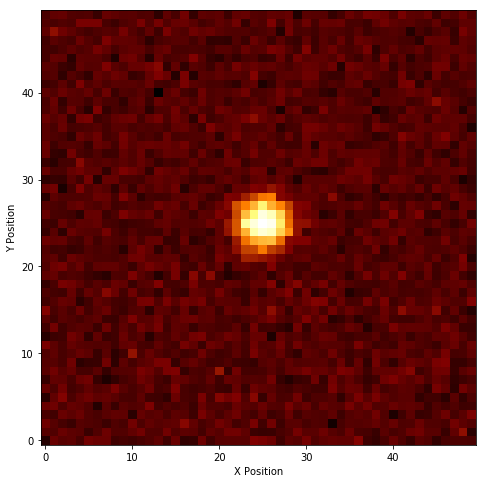

In [39]:
fig, (ax) = plt.subplots(figsize=(10,8),nrows=1)

ax.imshow(Model,origin='lower',cmap='afmhot')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')




## Nested Sampling Parameters

In [46]:
# Generate N samples
nlive_points = 800
nest_steps = 10000

mcmc_steps = 80

#Parameter limits
param_limits = np.array([[0,20],[0,50],[0,50],[0,5]])

# mcmc stepsize
param_step =  [.1,.1,.1,.1]   #[.5,.5,.3,.28]
stepsize = np.array(param_step) 

#Number of parameters
num_params = 4
n_walkers = 1

args2  = Model , sigma


labels = ['A','X','Y','R']

#Instiantiate the Explorer
explore = nsf.EXPLORER(logLikelihood, Prior ,stepsize,mcmc_steps)

In [47]:
Image_3sources = NS3.Nested_Sampling(logLikelihood, Prior, num_params, n_walkers,nsf.prior_transform_1, nest_steps,\
                                   nlive_points,labels,explore.mcmc_explorer)

Begin Drawing Live points from prior...
No. live points :  800
End Draw!


In [48]:
Image_3sources.nestedsampler()

  0% (6 of 10000) |                      | Elapsed Time: 0:00:00 ETA:   0:03:12

Begin nested sampling...
No. of runs :  10000
No. of parameters :  4


 99% (9999 of 10000) |################## | Elapsed Time: 0:03:05 ETA:   0:00:00


logZ = -1204.05704043828 
Information = 2992 nats

End nested sampling.


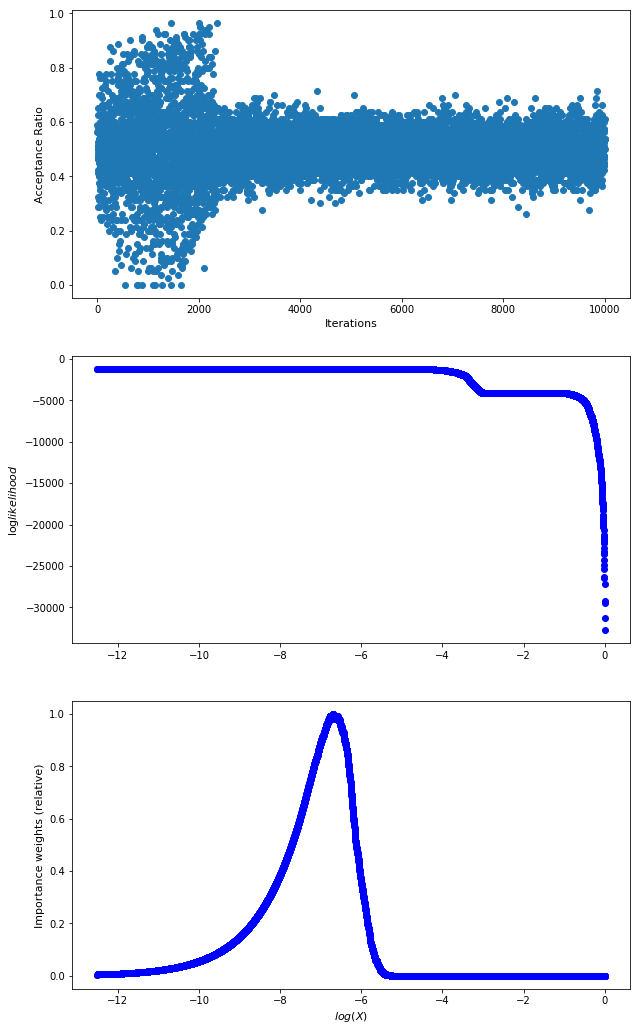

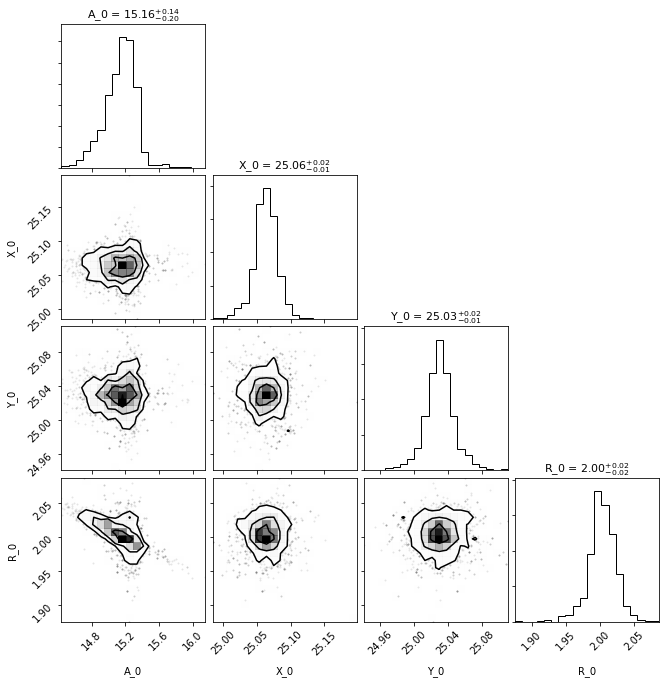

In [49]:
Image_3sources.analyze(fontsize=11)

In [51]:
print(tabulate([['A', 15.16, 0.14, 15], ['X', 25.06, 0.02, 25], ['Y', 25.03, 0.02, 25], ['R', 2.00, 0.02, 2]],  \
                        headers=['Parameter', 'Estimated', 'Standard dev', 'True value']))

Parameter      Estimated    Standard dev    True value
-----------  -----------  --------------  ------------
A                  15.16            0.14            15
X                  25.06            0.02            25
Y                  25.03            0.02            25
R                   2               0.02             2
